## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 
import pandas as pd

## Apartado 1

In [2]:
def generate_data(n, mu1, mu2, sigma1, sigma2):
    data = np.zeros((n, 2))
    for i in range(n):
        c = np.random.randint(0, 1)
        if c == 0:
            x = np.random.normal(mu1, sigma1)
        else:
            x = np.random.normal(mu2, sigma2)
        data[i] = [x, c]
    return data

def bayes_error(data, mu1, mu2, sigma1, sigma2):
    n = len(data)
    correct = 0
    for x, c in data:
        p0 = norm.pdf(x, mu1, sigma1) # calculo la densidad de probabilidad de que c sea 0 para la x que hemos sampleado
        p1 = norm.pdf(x, mu2, sigma2) # calculo la densidad de probabilidad de que c sea 1 para la x que hemos sampleado
        predicted_class = 0 if p0 > p1 else 1 # en función de cuál de las dos probabilidades es mayor, predigo la clase
        if predicted_class == c: # si la clase predicha es la misma que la real, sumo uno a correct
            correct += 1
    return 1 - (correct / n)
    
np.random.seed(25)
n_cases = [10, 20, 50, 100, 500, 1000, 5000]
mu_sigma_cases = [(0, 1, 1, 1), (0, 1, 1, 2)]

for mu1, mu2, sigma1, sigma2 in mu_sigma_cases:
    for n in n_cases:
        sample = generate_data(n, mu1, mu2, sigma1, sigma2)
        emp_error = bayes_error(sample, mu1, mu2, sigma1, sigma2)
        print(f"n = {n}, mu1 = {mu1}, mu2 = {mu2}, sigma1 = {sigma1}, sigma2 = {sigma2}, emp_error = {emp_error}") 


n = 10, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 1, emp_error = 0.30000000000000004
n = 20, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 1, emp_error = 0.4
n = 50, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 1, emp_error = 0.26
n = 100, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 1, emp_error = 0.22999999999999998
n = 500, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 1, emp_error = 0.33199999999999996
n = 1000, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 1, emp_error = 0.31100000000000005
n = 5000, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 1, emp_error = 0.3026
n = 10, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 2, emp_error = 0.0
n = 20, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 2, emp_error = 0.09999999999999998
n = 50, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 2, emp_error = 0.12
n = 100, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 2, emp_error = 0.16000000000000003
n = 500, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 2, emp_error = 0.14
n = 1000, mu1 = 0, mu2 = 1, sigma1 = 1, sigma2 = 2, emp_error = 0.15100000000000002
n = 5000, mu1 

## Apartado 2

In [308]:
def x_sampling(n):
    uniforme_1_5 = np.random.uniform(0, 1, (n, 5))
    uniforme_6_10 = np.random.uniform(100, 1000, (n, 5))
    x = np.hstack((uniforme_1_5, uniforme_6_10))
    return x

def least_squares(x, y):
    w_ideal = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
    return w_ideal

def regularized_least_squares(x, y, l):
    w_ideal = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x) + l*np.eye(10)), x.T), y)
    return w_ideal

### Apartados (a), (b), (c) y (d)

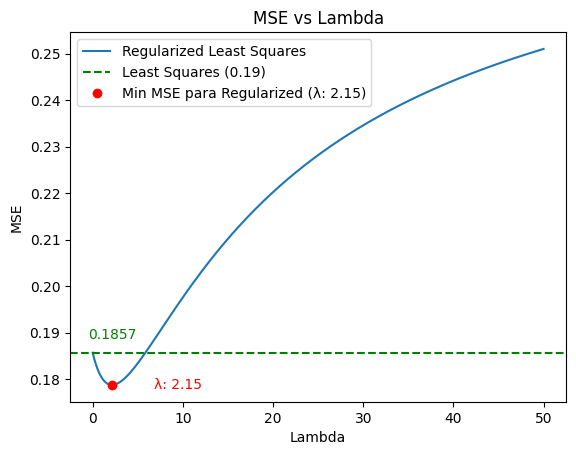

In [319]:
np.random.seed(22)
n_train = 100
n_test = 1000

x_train = x_sampling(n_train)
w = np.random.uniform(0, 1, (1, 10))
epsilon = np.random.normal(0, 1, (n_train, 1))
y_train = np.dot(x_train, w.T) + epsilon

x_test = x_sampling(n_test)
y_test = np.dot(x_test, w.T) # no necesitamos ruido (epsilon) en el test


y_pred = np.dot(x_test, least_squares(x_train, y_train))
mse_ls = np.mean((y_test - y_pred)**2)

lambdas = np.linspace(0, 50, 1000) 
mses_reg = []
for l in lambdas:
    y_pred = np.dot(x_test, regularized_least_squares(x_train, y_train, l))
    mse = np.mean((y_test - y_pred)**2)
    mses_reg.append(mse)
    
min_mse = min(mses_reg)
min_lambda = lambdas[mses_reg.index(min_mse)]

plt.plot(lambdas, mses_reg)
plt.axhline(y=mse_ls, color='g', linestyle='--')
plt.plot(min_lambda, min_mse, 'ro')
plt.legend(['Regularized Least Squares', f'Least Squares ({mse_ls.round(2)})', f'Min MSE para Regularized (λ: {min_lambda.round(2)})'])
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('MSE vs Lambda')
plt.text(min_lambda+10, min_mse-0.0015, f'λ: {min_lambda.round(2)}', color='red', verticalalignment='bottom', horizontalalignment='right')
plt.annotate(f'{mse_ls.round(4)}', xy=(-0.5, mse_ls+0.003), color='green', fontsize=10)
plt.show()



### Apartado "*Extension*"

In [318]:
np.random.seed(22)
n_train = 100
n_test = 1000

x_train = x_sampling(n_train)
x_test = x_sampling(n_test)

X = np.vstack((x_train, x_test))

U, sigma, V_T = np.linalg.svd(X)

num_singular_values = len(sigma)

if num_singular_values >= 3:
    indices = np.argsort(sigma)

    sigma[indices[0]] *= 1e-5
    sigma[indices[1]] *= 1e-5
    sigma[indices[2]] *= 1e-5

sigma_modified = np.zeros_like(X, dtype=float)
np.fill_diagonal(sigma_modified, sigma)

# Reconstruct the original matrix with modified singular values
x_train_reconstruida = np.dot(np.dot(U,sigma_modified),V_T)

x_train_reconstruida = X[:100,:] 
x_test_reconstruida = X[100:,:]

# obtain two different samples for y and compute the corresponding w_ideal
w = np.random.uniform(0, 1, (1, 10))
epsilon = np.random.normal(0, 1, (n_train, 1))
y_train = np.dot(x_train_reconstruida, w.T) + epsilon

y_test = np.dot(x_test_reconstruida, w.T)




[[0.64302803]
 [1.14969589]
 [0.38901637]
 [0.31181092]
 [1.14564123]
 [0.16843001]
 [0.17627765]
 [0.91649259]
 [0.74386975]
 [0.90519356]]
[[0.64302803]
 [1.14969589]
 [0.38901637]
 [0.31181092]
 [1.14564123]
 [0.16843001]
 [0.17627765]
 [0.91649259]
 [0.74386975]
 [0.90519356]]
